## Analysing Mallow's phi vs data generation eta

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def count_swaps(N, eta):
    c = 0
    for i in range(1, N):
        for j in range(i, 0, -1):
            if eta >= np.random.uniform(0.0,1.0):
                c += 1
    return c

print(count_swaps(10, 0.5))

19


In [5]:
def analysis(num_iters, N_min, N_max, N_inc, eta):
    out = []
    for N in range(N_min, N_max+1, N_inc):
        this_N = []
        for _ in range(num_iters):
            this_N.append(count_swaps(N, eta) * 1.0)
        out.append((N, np.sum(this_N) / num_iters))
    return out

print(analysis(10, 10, 20, 1,  0.5))

[(10, 23.2), (11, 29.3), (12, 34.9), (13, 38.5), (14, 47.1), (15, 52.8), (16, 58.8), (17, 69.1), (18, 75.2), (19, 85.1), (20, 98.9)]


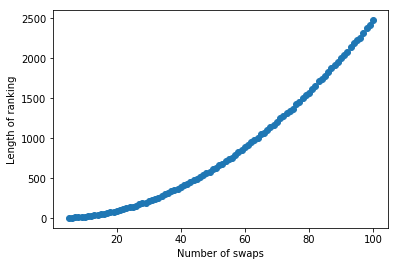

In [16]:
%matplotlib inline

x, y = zip(*analysis(num_iters=10, N_min=5, N_max=100, N_inc=1, eta=0.5))
plt.scatter(x,y)
plt.xlabel('Number of swaps')
plt.ylabel('Length of ranking')
plt.show()

In [17]:
np.polyfit(x, np.log(y), 1)

array([0.05029353, 3.4503886 ])

array([0.05029353, 3.4503886 ]) means the curve fitted is y = exp(0.503) + exp(3.450 * x)
which equals 
y = 1.05 + e ^ 3.45x
Plotting this function, we can see that it doesn't match the data. :(